In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [324]:
x=pd.read_csv("https://raw.githubusercontent.com/MrMittalY/Covid-Project/master/case_time_series.csv")

In [325]:
x

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
118,27 May,7246,158104,3434,67725,188,4534
119,28 May,7254,165358,3171,70896,176,4710
120,29 May,8138,173496,11735,82631,269,4979
121,30 May,8364,181860,4303,86934,205,5184


In [326]:
x.style.background_gradient()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
5,04 February,0,3,0,0,0,0
6,05 February,0,3,0,0,0,0
7,06 February,0,3,0,0,0,0
8,07 February,0,3,0,0,0,0
9,08 February,0,3,0,0,0,0


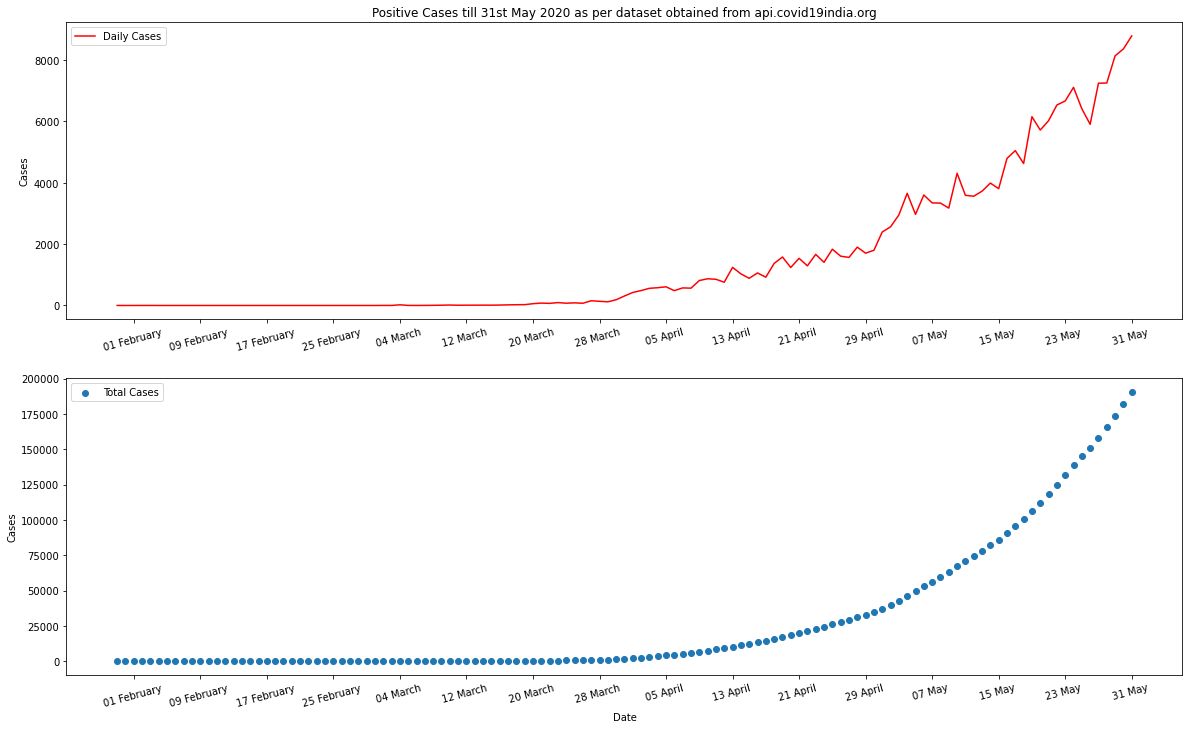

In [327]:
fig=plt.figure(figsize=(20,12))

plt.subplot(211);
plt.plot(x["Date"],x["Daily Confirmed"],'Red')
plt.xticks(np.arange(2, 124, 8),rotation=15)
plt.title("Positive Cases till 31st May 2020 as per dataset obtained from api.covid19india.org")
plt.legend(['Daily Cases'])
plt.ylabel("Cases")

plt.subplot(212);
plt.scatter(x["Date"],x["Total Confirmed"])
plt.xticks(np.arange(2, 124, 8),rotation=15)
plt.legend(['Total Cases'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()


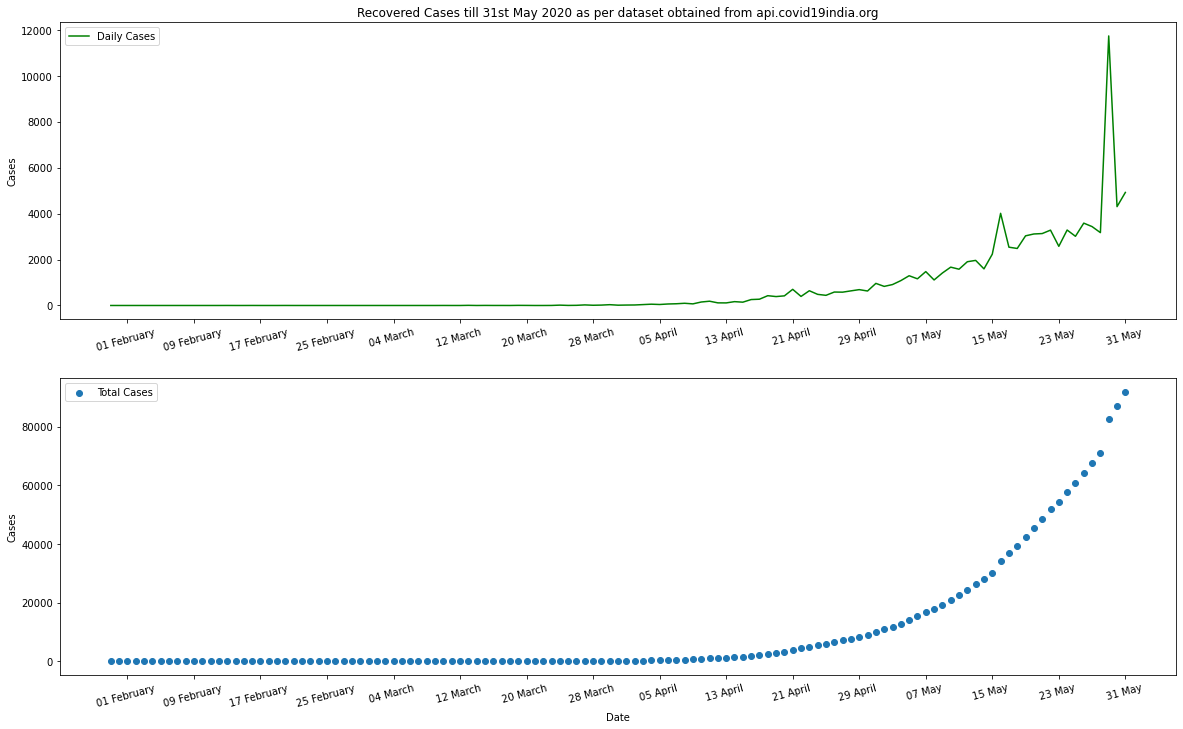

In [328]:
fig=plt.figure(figsize=(20,12))

plt.subplot(211);
plt.plot(x["Date"],x["Daily Recovered"],'Green')
plt.xticks(np.arange(2, 124, 8),rotation=15)
plt.title("Recovered Cases till 31st May 2020 as per dataset obtained from api.covid19india.org")
plt.legend(['Daily Cases'])
plt.ylabel("Cases")

plt.subplot(212);
plt.scatter(x["Date"],x["Total Recovered"])
plt.xticks(np.arange(2, 124, 8),rotation=15)
plt.legend(['Total Cases'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

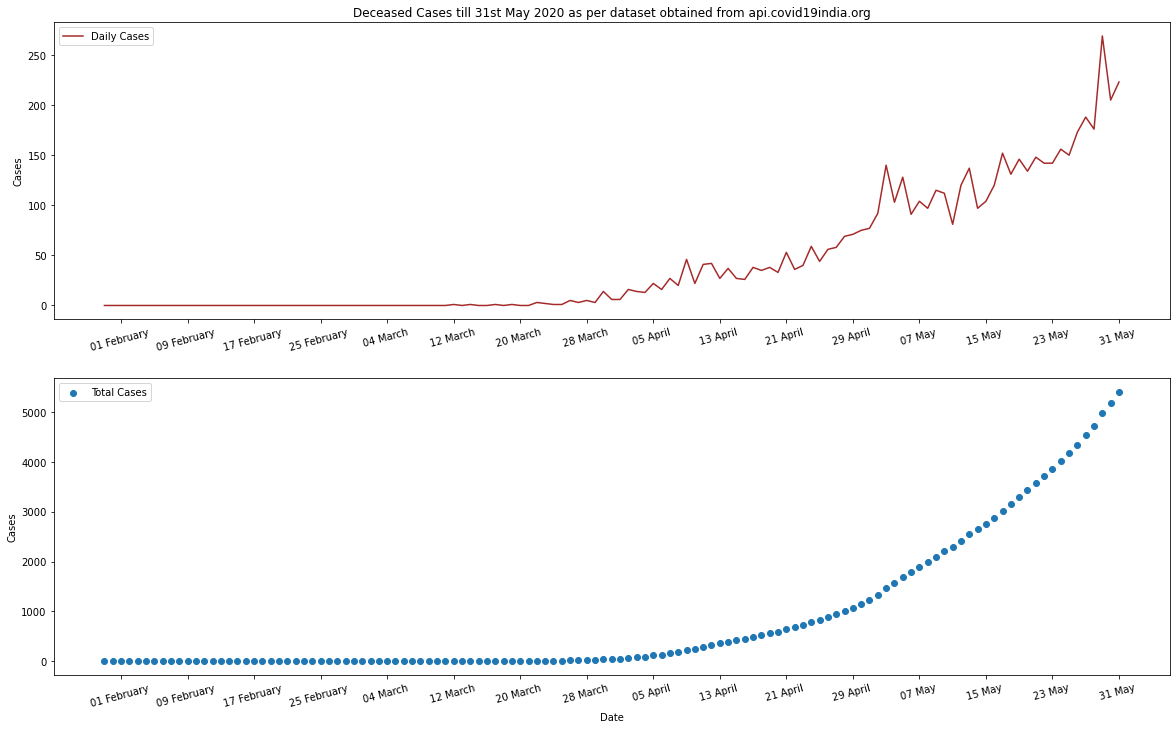

In [329]:
fig=plt.figure(figsize=(20,12))

plt.subplot(211);
plt.plot(x["Date"],x["Daily Deceased"],'Brown')
plt.xticks(np.arange(2, 124, 8),rotation=15)
plt.title("Deceased Cases till 31st May 2020 as per dataset obtained from api.covid19india.org")
plt.legend(['Daily Cases'])
plt.ylabel("Cases")

plt.subplot(212);
plt.scatter(x["Date"],x["Total Deceased"])
plt.xticks(np.arange(2, 124, 8),rotation=15)
plt.legend(['Total Cases'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

In [330]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             123 non-null    object
 1   Daily Confirmed  123 non-null    int64 
 2   Total Confirmed  123 non-null    int64 
 3   Daily Recovered  123 non-null    int64 
 4   Total Recovered  123 non-null    int64 
 5   Daily Deceased   123 non-null    int64 
 6   Total Deceased   123 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.9+ KB


In [331]:
n=[]
for i in range(len(x)):
    n.append(i)

In [332]:
daily_confirmed=x[["Daily Confirmed"]]
daily_recovered=x[["Daily Recovered"]]
daily_deceased=x[["Daily Deceased"]]

In [333]:
Date=[]
month=" June"
for i in range(1,31):
    Date.append(str(i)+month)
    
month=" July"
for i in range(1,32):
    Date.append(str(i)+month)

In [334]:
from pmdarima.arima import auto_arima

In [335]:

m_confirmed=auto_arima(daily_confirmed)
m_confirmed.fit(daily_confirmed)
predicted_confirmed=m_confirmed.predict(n_periods=61)

Total_Confirmed=x[["Total Confirmed"]].values[121,:][0]
total_confirmed=[]
for i in range(len(predicted_confirmed)):
    predicted_confirmed[i]=int(predicted_confirmed[i])
    Total_Confirmed=Total_Confirmed+predicted_confirmed[i]
    total_confirmed.append(Total_Confirmed)
    
Confirmed_Predicted=pd.DataFrame()
Confirmed_Predicted["Date"]=Date
Confirmed_Predicted["Predicted Confirmed"]=predicted_confirmed
Confirmed_Predicted["Total Confirmed"]=total_confirmed

c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [336]:
Confirmed_Predicted

,Date,Predicted Confirmed,Total Confirmed
0,1 June,8869.0,190729.0
1,2 June,9127.0,199856.0
2,3 June,9388.0,209244.0
3,4 June,9651.0,218895.0
4,5 June,9917.0,228812.0
...,...,...,...
56,27 July,27028.0,1169954.0
57,28 July,27421.0,1197375.0
58,29 July,27816.0,1225191.0
59,30 July,28213.0,1253404.0


In [337]:
Confirmed_Predicted.style.background_gradient(cmap="Reds")

,Date,Predicted Confirmed,Total Confirmed
0,1 June,8869.000000,190729.000000
1,2 June,9127.000000,199856.000000
2,3 June,9388.000000,209244.000000
3,4 June,9651.000000,218895.000000
4,5 June,9917.000000,228812.000000
5,6 June,10185.000000,238997.000000
6,7 June,10456.000000,249453.000000
7,8 June,10729.000000,260182.000000
8,9 June,11004.000000,271186.000000
9,10 June,11282.000000,282468.000000


In [338]:
m_recovered=auto_arima(daily_recovered)
m_recovered.fit(daily_recovered)

predicted_recovered=m_recovered.predict(n_periods=61)
Total_Recovered=x[["Total Recovered"]].values[121,:][0]
total_recovered=[]

for i in range(len(predicted_recovered)):
    predicted_recovered[i]=int(predicted_recovered[i])
    Total_Recovered=Total_Recovered+predicted_recovered[i]
    total_recovered.append(Total_Recovered)

Recovered_Predicted=pd.DataFrame()
Recovered_Predicted["Date"]=Date
Recovered_Predicted["Predicted Recovered"]=predicted_recovered
Recovered_Predicted["Total Recovered"]=total_recovered

c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using ze

In [339]:
Recovered_Predicted

,Date,Predicted Recovered,Total Recovered
0,1 June,14770.0,101704.0
1,2 June,6991.0,108695.0
2,3 June,11475.0,120170.0
3,4 June,14555.0,134725.0
4,5 June,9668.0,144393.0
...,...,...,...
56,27 July,23576.0,1115494.0
57,28 July,23768.0,1139262.0
58,29 July,23959.0,1163221.0
59,30 July,24149.0,1187370.0


In [340]:
Recovered_Predicted.style.background_gradient(cmap="Greens")

,Date,Predicted Recovered,Total Recovered
0,1 June,14770.000000,101704.000000
1,2 June,6991.000000,108695.000000
2,3 June,11475.000000,120170.000000
3,4 June,14555.000000,134725.000000
4,5 June,9668.000000,144393.000000
5,6 June,14483.000000,158876.000000
6,7 June,13982.000000,172858.000000
7,8 June,12102.000000,184960.000000
8,9 June,15578.000000,200538.000000
9,10 June,13914.000000,214452.000000


In [341]:
m_deceased=auto_arima(daily_deceased)
m_deceased.fit(daily_deceased)

predicted_deceased=m_deceased.predict(n_periods=61)
Total_Deceased=x[["Total Deceased"]].values[121,:][0]
total_deceased=[]

for i in range(len(predicted_deceased)):
    predicted_deceased[i]=int(predicted_deceased[i])
    Total_Deceased=Total_Deceased+predicted_deceased[i]
    total_deceased.append(Total_Deceased)

Deceased_Predicted=pd.DataFrame()
Deceased_Predicted["Date"]=Date
Deceased_Predicted["Predicted Deceased"]=predicted_deceased
Deceased_Predicted["Total Deceased"]=total_deceased


c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\yash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

In [342]:
Deceased_Predicted

,Date,Predicted Deceased,Total Deceased
0,1 June,229.0,5413.0
1,2 June,234.0,5647.0
2,3 June,239.0,5886.0
3,4 June,245.0,6131.0
4,5 June,250.0,6381.0
...,...,...,...
56,27 July,612.0,28322.0
57,28 July,620.0,28942.0
58,29 July,629.0,29571.0
59,30 July,637.0,30208.0


In [343]:
Deceased_Predicted.style.background_gradient(cmap="Purples")

,Date,Predicted Deceased,Total Deceased
0,1 June,229.000000,5413.000000
1,2 June,234.000000,5647.000000
2,3 June,239.000000,5886.000000
3,4 June,245.000000,6131.000000
4,5 June,250.000000,6381.000000
5,6 June,256.000000,6637.000000
6,7 June,261.000000,6898.000000
7,8 June,267.000000,7165.000000
8,9 June,273.000000,7438.000000
9,10 June,278.000000,7716.000000


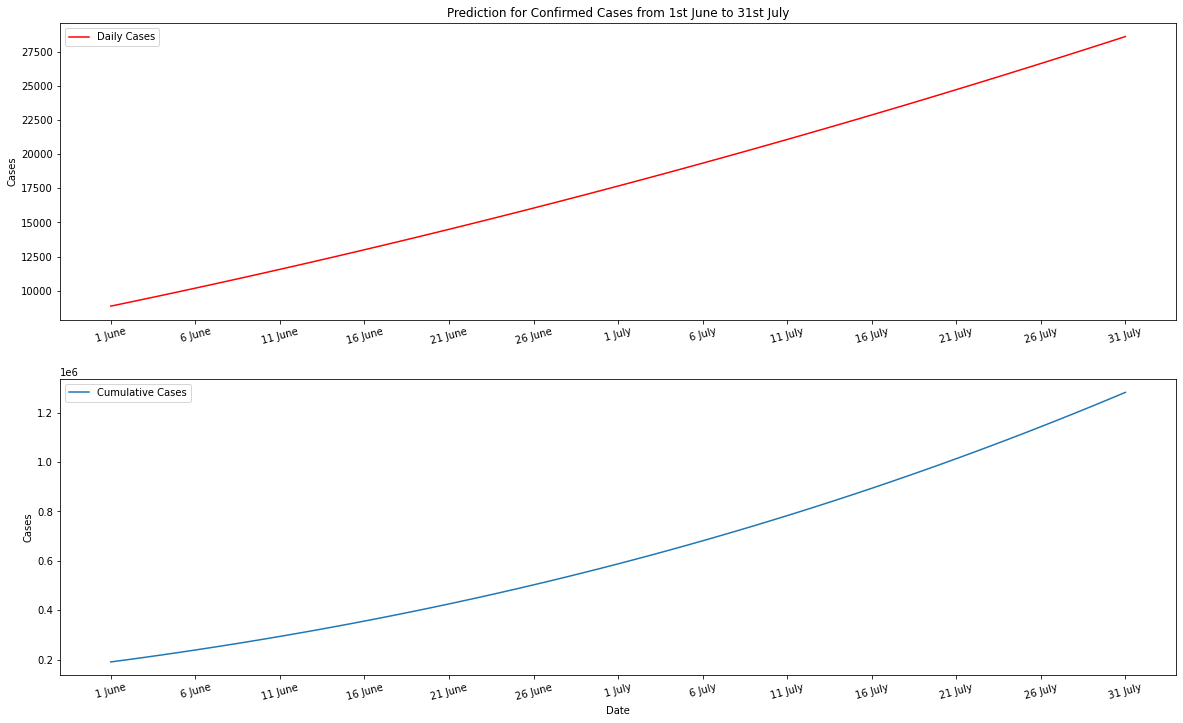

In [344]:
fig=plt.figure(figsize=(20,12))

plt.subplot(211);
plt.plot(Confirmed_Predicted["Date"],Confirmed_Predicted["Predicted Confirmed"],'Red')
plt.xticks(np.arange(0, 61, 5),rotation=15)
plt.title("Prediction for Confirmed Cases from 1st June to 31st July")
plt.legend(['Daily Cases'])
plt.ylabel("Cases")

plt.subplot(212);
plt.plot(Confirmed_Predicted["Date"],Confirmed_Predicted["Total Confirmed"])
plt.xticks(np.arange(0, 61, 5),rotation=15)
plt.legend(['Cumulative Cases'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()


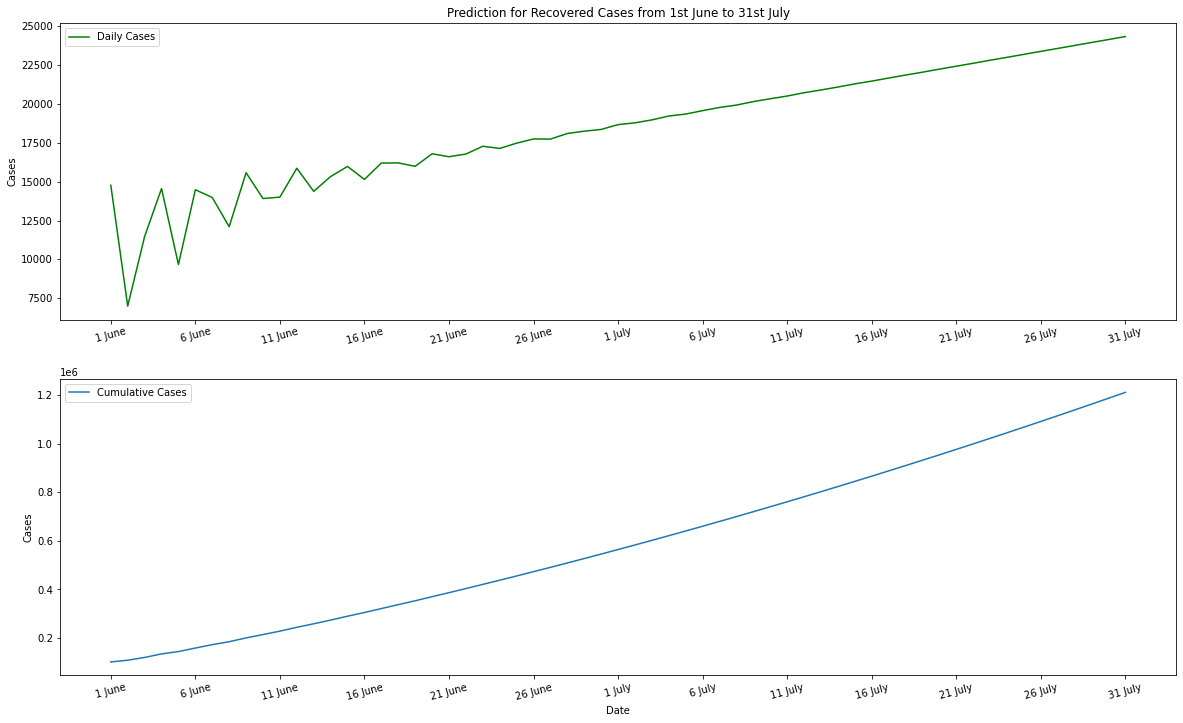

In [345]:
fig=plt.figure(figsize=(20,12))

plt.subplot(211);
plt.plot(Recovered_Predicted["Date"],Recovered_Predicted["Predicted Recovered"],'Green')
plt.xticks(np.arange(0, 61, 5),rotation=15)
plt.title("Prediction for Recovered Cases from 1st June to 31st July")
plt.legend(['Daily Cases'])
plt.ylabel("Cases")

plt.subplot(212);
plt.plot(Recovered_Predicted["Date"],Recovered_Predicted["Total Recovered"])
plt.xticks(np.arange(0, 61, 5),rotation=15)
plt.legend(['Cumulative Cases'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

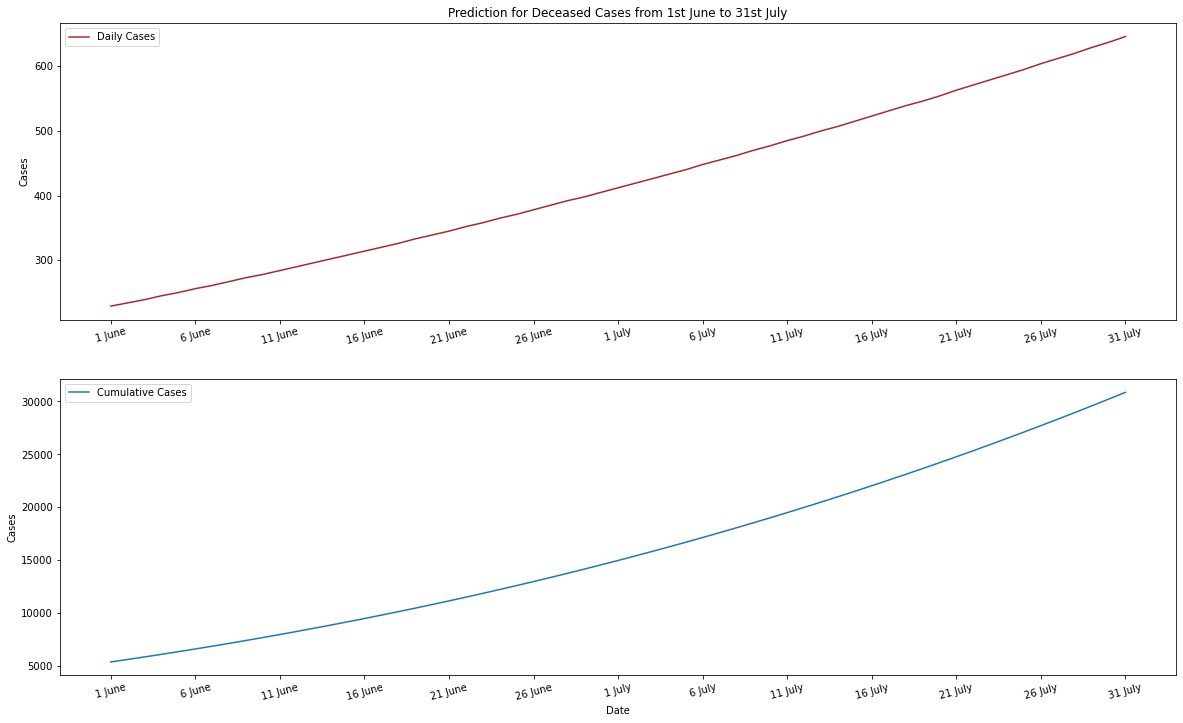

In [346]:
fig=plt.figure(figsize=(20,12))

plt.subplot(211);
plt.plot(Deceased_Predicted["Date"],Deceased_Predicted["Predicted Deceased"],'Brown')
plt.xticks(np.arange(0, 61, 5),rotation=15)
plt.title("Prediction for Deceased Cases from 1st June to 31st July")
plt.legend(['Daily Cases'])
plt.ylabel("Cases")

plt.subplot(212);
plt.plot(Deceased_Predicted["Date"],Deceased_Predicted["Total Deceased"])
plt.xticks(np.arange(0, 61, 5),rotation=15)
plt.legend(['Cumulative Cases'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

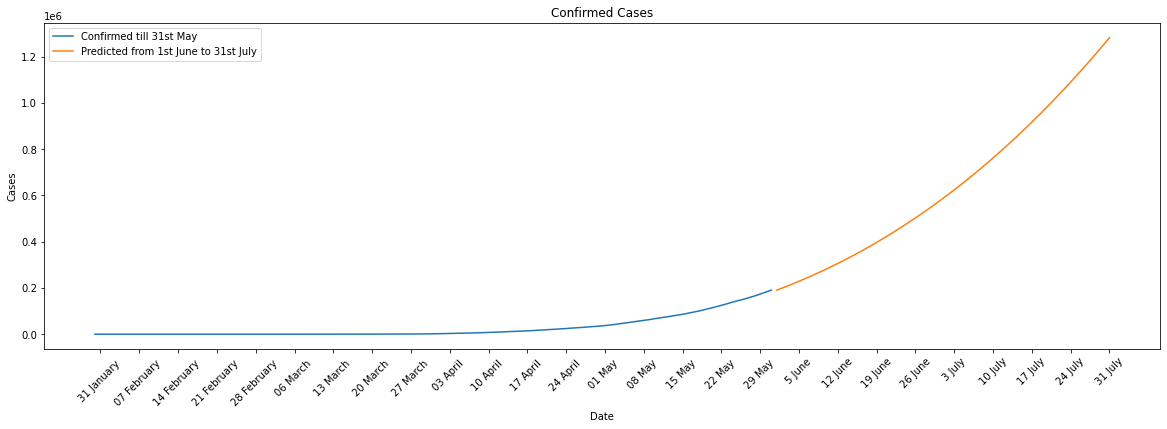

In [347]:
fig=plt.figure(figsize=(20,6))
plt.xticks(np.arange(1, 185, 7),rotation=45)
plt.plot(x["Date"],x["Total Confirmed"])
plt.plot(Confirmed_Predicted["Date"],Confirmed_Predicted["Total Confirmed"])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Confirmed Cases")
plt.legend(["Confirmed till 31st May","Predicted from 1st June to 31st July"])
plt.show()

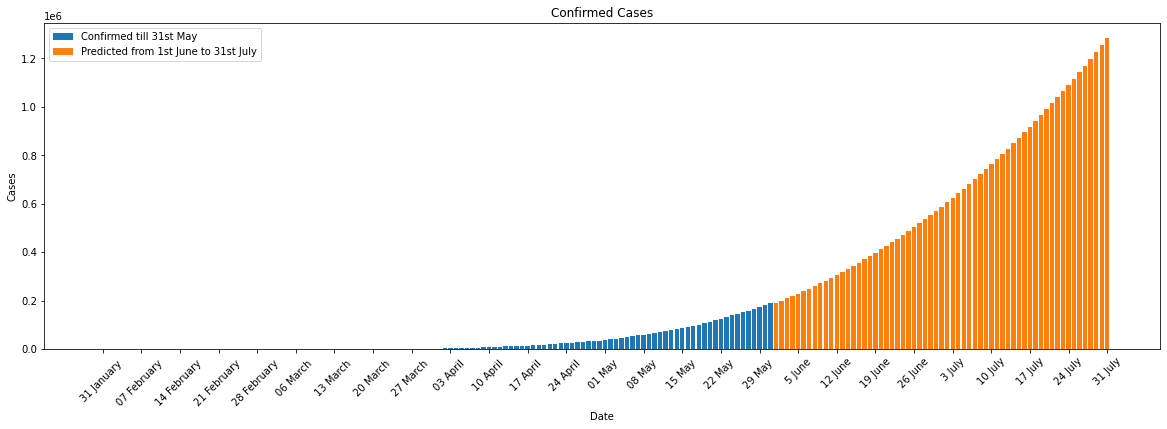

In [348]:
fig=plt.figure(figsize=(20,6))
plt.xticks(np.arange(1, 185, 7),rotation=45)
plt.bar(x["Date"],x["Total Confirmed"])
plt.bar(Confirmed_Predicted["Date"],Confirmed_Predicted["Total Confirmed"])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Confirmed Cases")
plt.legend(["Confirmed till 31st May","Predicted from 1st June to 31st July"])
plt.show()

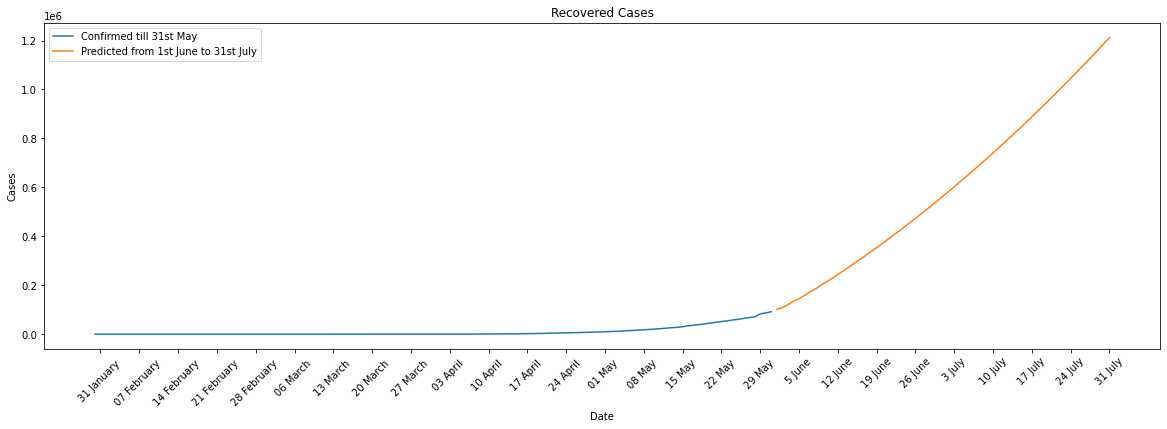

In [349]:
fig=plt.figure(figsize=(20,6))
plt.xticks(np.arange(1, 185, 7),rotation=45)
plt.plot(x["Date"],x["Total Recovered"])
plt.plot(Recovered_Predicted["Date"],Recovered_Predicted["Total Recovered"])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Recovered Cases")
plt.legend(["Confirmed till 31st May","Predicted from 1st June to 31st July"])
plt.show()

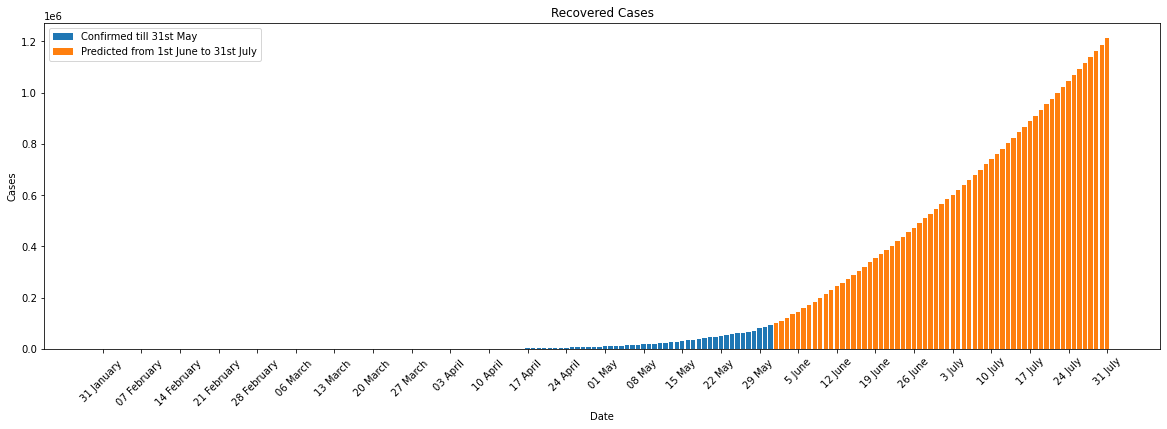

In [350]:
fig=plt.figure(figsize=(20,6))
plt.xticks(np.arange(1, 185, 7),rotation=45)
plt.bar(x["Date"],x["Total Recovered"])
plt.bar(Recovered_Predicted["Date"],Recovered_Predicted["Total Recovered"])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Recovered Cases")
plt.legend(["Confirmed till 31st May","Predicted from 1st June to 31st July"])
plt.show()

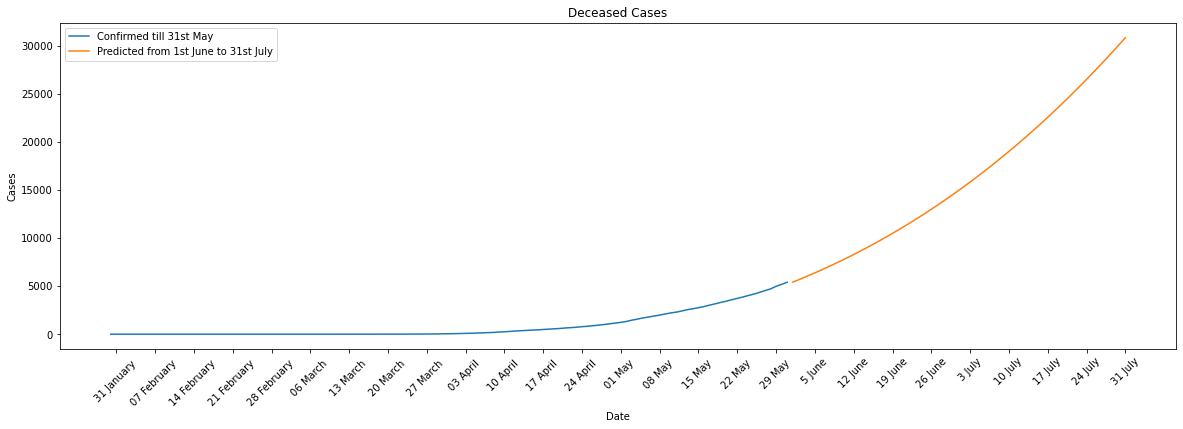

In [351]:
fig=plt.figure(figsize=(20,6))
plt.xticks(np.arange(1, 185, 7),rotation=45)
plt.plot(x["Date"],x["Total Deceased"])
plt.plot(Deceased_Predicted["Date"],Deceased_Predicted["Total Deceased"])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Deceased Cases")
plt.legend(["Confirmed till 31st May","Predicted from 1st June to 31st July"])
plt.show()

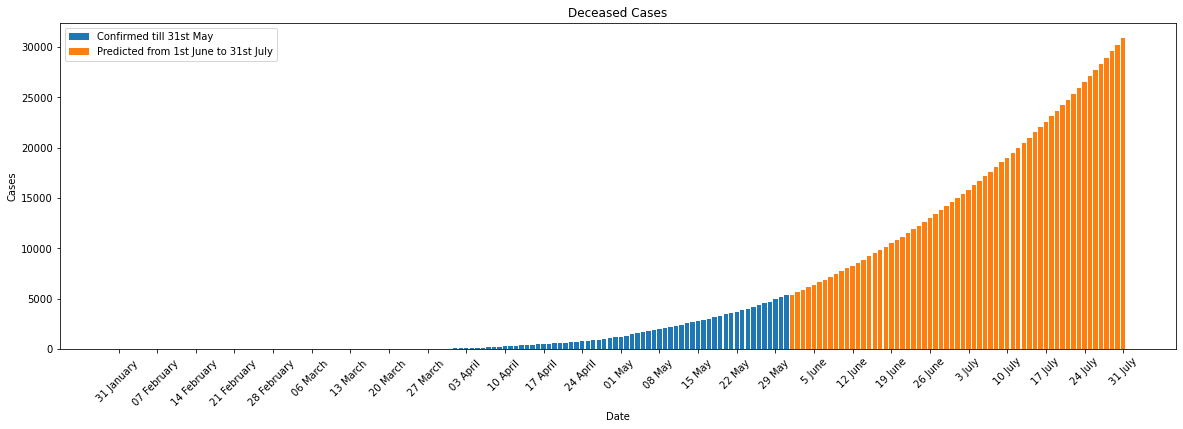

In [352]:
fig=plt.figure(figsize=(20,6))
plt.xticks(np.arange(1, 185, 7),rotation=45)
plt.bar(x["Date"],x["Total Deceased"])
plt.bar(Deceased_Predicted["Date"],Deceased_Predicted["Total Deceased"])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Deceased Cases")
plt.legend(["Confirmed till 31st May","Predicted from 1st June to 31st July"])
plt.show()